# TD2: Le Neurone I
---

## Préparation : introduction à l'intégration numérique d'équations différentielles

L'évolution temporelle ou la dynamique d'un système physique (planètes, potentiel de membrane) est souvent décrit par des équations différentielles, c'est-à-dire une équation du type

$$ \frac{dx}{dt} = f(x, t) $$

Quand ces équations sont simples (quand $f$ est une fonction simple de ses arguments), nous pouvons résoudre ces équations analytiquement. Par exemple, prenons $f(x,t) = - x/\tau$, avec un paramètre $\tau$. Du coup, $ \frac{dx}{dt} = -x/\tau$. La solution de cette equation différentielle, avec la condition initiale $x(t=0)=x_0$, est donnée par $ x(t) = x_0 e^{-t/\tau}$.

Cependant, il peut s'avérer utile de pouvoir résoudre de telles équations de manière numérique, soit pour vérifier un résultat obtenu analytiquement, soit parce qu'on n'a pas pu déterminer la solution autrement (peut-être une solution analytique n'existe même pas).  


#### La méthode d'Euler

Une méthode très simple et très "directe" pour résoudre numériquement des équations différentielles est la *méthode d'Euler*, qui répose sur la discrétisation dans le temps de la dynamique et de l'approximation de la dérivée temporelle par une différence discrète entre deux points consécutifs dans le temps :


$$\frac{dx}{dt}\approx\frac{\Delta x}{\Delta t} \ \ \Rightarrow \ \ \Delta x \approx \Delta t \frac{dx}{dt}=\Delta t f(x,t)$$

Ce qui implique, pour $x(t+\Delta t) = x(t) + \Delta x$ :

$$ x(t+\Delta t) = x(t) + \Delta t f(x,t)$$


In [ ]:
# Let us first plot the analytical solution,
# and then try to find the numerical solution
# for the same dynamics

# We start with our usual imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

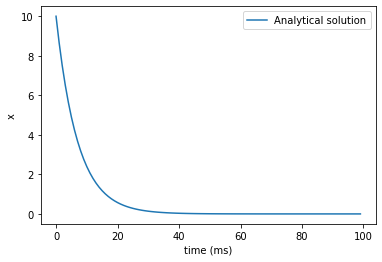

In [ ]:
# Example: exponential decay dynamics

# define parameters
tau = 7.0    # decay time constant (in ms)
x0 = 10.0    # initial value

# an array of times
t = np.arange(0, 100)

# This is the right-hand side of the differential equation
# (the time-derivative of v(t); it depends only on the 
# voltage and not on the time t)
def f(x, t=None):
    return -x/tau

# For this simple case, we already know
# the solution of the ODE:
def x_analytical(t):
    return x0*np.exp(-t/tau)

fig, ax = plt.subplots()
ax.plot(t, x_analytical(t), label='Analytical solution')
ax.set_xlabel('time (ms)')
ax.set_ylabel('x')
ax.legend()

**Question :** Est-ce que nous pouvons calculer $x(t)$ en utilisant $f(x,t)$ seulement, c'est-à-dire sans utiliser la solution connue ?

In [ ]:
# Q: Can you translate the Euler formula into an algorithm?
# A: Yes, the Euler formula prescribes an iterative method, 
#    where we have to compute the solution from one timestep
#    to the next!

# We should define a time step and an integration time:
dt = 1.0
T = 100.
nt = int(T/dt)
t_euler = dt*np.arange(nt)
print(t_euler[:10])

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
# An empty array to be filled with the computed values
# of the voltage:
x_euler = np.zeros(nt)

# Implement the initial condition
x_euler[0] = x0

# Our array with the solution BEFORE computing the values
print(x_euler[:10])

[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [ ]:
# use Euler formula iteratively:

# ... your code ...
for i in range(nt-1):
    #x_euler[i+1] = x_euler[i] + dt*f(x_euler[i],t_euler[i])
    #x_euler[i+1] = x_euler[i] + dt*f(x_euler[i],None)
    x_euler[i+1] = x_euler[i] + dt*f(x_euler[i])

# Our array with the solution AFTER computing the values
print(x_euler[:10])

[10.          8.57142857  7.34693878  6.29737609  5.39775094  4.62664366
  3.96569457  3.39916677  2.91357152  2.49734702]


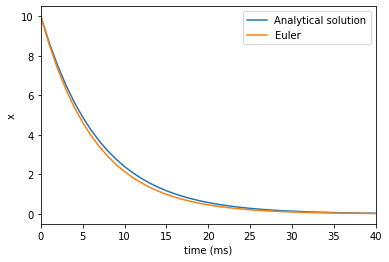

In [ ]:
# Plot here the theoretical result 
# together with your numerical solution.

fig, ax = plt.subplots()
ax.plot(t_euler, x_analytical(t_euler), label='Analytical solution')
ax.plot(t_euler, x_euler, label='Euler')
ax.set_xlabel('time (ms)')
ax.set_ylabel('x')
ax.set_xlim(0,40)
ax.legend()

Pour `dt = 1.0` ms, le résultat n'est pas vraiment identique au résultat analytique (la vraie solution) ! Pourquoi ? 

Quand nous utilisons la méthode d'Euler, **le résultat dépend de manière cuciale du pas de temps** utilisé ! 

*Question :* Comment est-ce qu'on peut savoir que le résultat est correct ? 

*Reponse :* Répeter le calcul avec un pas de temps diminué (par ex. divisé par deux) et vérifier si le résultat converge !

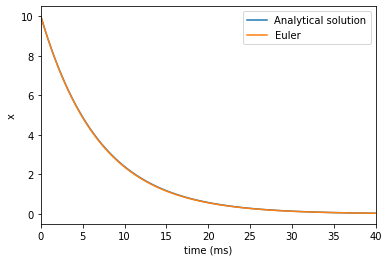

In [ ]:
# Repeat the above for different time steps and compare.
# We should define a time step and an integration time:

dt = 0.1
T = 100.
nt = int(T/dt)
t_euler = dt*np.arange(nt)

# An empty array to be filled with the computed values
# of the voltage:
x_euler = np.zeros(nt)

# Implement the initial condition
x_euler[0] = x0

for i in range(nt-1):
    x_euler[i+1] = x_euler[i] + dt*f(x_euler[i],None)

fig, ax = plt.subplots()
ax.plot(t_euler, x_analytical(t_euler), label='Analytical solution')
ax.plot(t_euler, x_euler, label='Euler')
ax.set_xlabel('time (ms)')
ax.set_ylabel('x')
ax.set_xlim(0,40)
ax.legend()

For small enough time steps, the result should not depend on the value of the time step anymore! 

#### Utiliser une fonction pour résoudre des équations différentiells fournie par `scipy` 

L'avantage premier et indéniable de la méthode d'Euler est sa simplicité absolue. Dans beaucoup de circonstances, on peut néanmoins utiliser des algorithmes plus puissants, dans le sens d'une meilleure convergence au résultat correct en terme de pas de temps utilisé, robustesse etc. Au lieu d'implémenter nous-mêmes ces autres algorithmes, la solution la plus simple est souvent d'utiliser les fonctionnalités fournies par des bibliothèques de calcul scientifique. Notamment, un tel "ODE solver" fait partie du module `scipy` : la fonction  `scipy.integrate.odeint` 


In [ ]:
# We can use a numerical solver that is already 
# programmed for us!
from scipy.integrate import odeint

In [ ]:
# check out the documentation
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

In [ ]:
# Based on the documentation, can you use odeint to obtain 
# another numerical solution for x(t)? 
t_odeint = np.arange(0,110,10)
print(t_odeint)

# ...your code...
x_odeint = odeint(f, x0, t_odeint)

[  0  10  20  30  40  50  60  70  80  90 100]


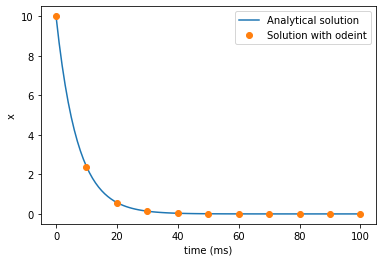

In [ ]:
# Plot a comparison of the theoretical and the two
# numerical solutions here.
fig, ax = plt.subplots()
ax.plot(t, x_analytical(t), label='Analytical solution')
ax.plot(t_odeint, x_odeint, 'o', label='Solution with odeint')
ax.set_xlabel('time (ms)')
ax.set_ylabel('x')
ax.legend()

**ATTENTION :** `scipy.integrate.odeint` nécessite toujours que la fonction qui donne la dérivée prend le temps en deuxième argument (même si $f(x,t)=f(x)$ ne dépend pas explicitement du temps).


# Le modèle de FitzHugh-Nagumo

Le modèle de Hodgkin-Huxley décrit la dynamique du potentiel de membrane d'un neurone avec quatre variables couplées, $V$, $n$, $m$ et $h$. L'espace de phase a donc 4 dimensions et la dynamique complète ne peut pas être répresentée dans un plan. Par ailleurs, la dynamique du modèle ne peut être résolue analytiquement puisque trop compliquée. 

Pour mieux étudier les régimes dynamiques sous-jacent de la décharge neuronale, Richard FitzHugh a proposé un modèle simplifié à deux variables qui réproduit plusieurs phénomènes observés dans le modèle complet de Hodgkin-Huxley. 

Les équations du modèle sont données par

$$ \frac{dV}{dt} = V - V^3/3 - W + I ,$$

et 

$$\frac{dW}{dt} = 0.08 ( V + 0.7 - 0.8 W) , $$

où:

1. La variable $V$, avec une nonlinéarité permettant l'excitation, est censé d'écrire le potentiel de membrane. 

2. La variable $W$, avec une dynamique plus lente linéaire, décrit la rélaxation. 

3. Une constante $I$ répresente le courant injecté.



## Exercise : Solution numérique du modèle FitzHugh-Nagumo

Essayez de résoudre numériquement l'évolution temporelle de $V$ et de $W$ pour un courant $I$ donné. Utilisez à cette fin une discretisation dans le temps avec des pas de temps `dt` la méthode d'Euler pour déterminer les valeurs de $V$ et $W$ à des instants consécutifs en fonction de leurs valeurs précédentes. 

**Astuce :** Pour calculer `V[i+1]` et `W[i+1]`, où l'index `i`  correspond au temps `i*dt`, définissez les deux fonctions `dVdt(v, w, I)`, `dWdt(v,w)` qui retourneront les dérivés temporelles de $V$ et de $W$ décrivées par les équations ci-dessus. 

In [ ]:
# Your code:

# 1 - définir les paramètres de discretisation temporelle
dt = 0.01
T = 500.0
t = np.arange(0,T,dt)
nt = len(t)

# 2 - créer les array pour V et pour W à déterminer
V = np.zeros(nt)
W = np.zeros(nt)

# 3 - définir les fonctions dVdt(v, w,I), dWdt(v,w)
def fV(V, W, I):
    return V - V**3/3 - W + I

def fW(V, W):
    return 0.08*(V + 0.7 - 0.8*W)

# 4 - choisir une valeur pour le courant injecté
# (choose currents between 0 and 1)

I = 0.4

# 5 - boucle sur les pas de temps consécutifs
# (Euler method)

for i in range(nt-1):
    V[i+1] = V[i] + dt*fV(V[i], W[i], I)
    W[i+1] = W[i] + dt*fW(V[i], W[i])

Text(0, 0.5, 'V/W')

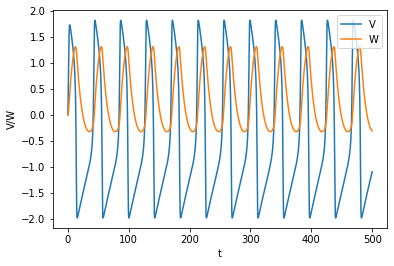

In [ ]:
# Plot the result for the membrane potential (variable V) 
# for a given value of I (try different values)
fig, ax = plt.subplots()
ax.plot(t, V, label='V')
ax.plot(t, W, label='W')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('V/W')

In [ ]:
# FitzHugh-Nagumo avec odeint

y0 = np.zeros(2) # [V0, W0]

I0 = 0.5

def f_FHN(y, t=None, I=I0):
    V = y[0]
    W = y[1]
    # V, W = y
    dVdt = fV(V,W,I)
    dWdt = fW(V,W)
    dydt = np.array([dVdt, dWdt])
    return dydt
    

In [ ]:
y = odeint(f_FHN, y0, t, args=(0.2,))

In [ ]:
y.shape

(50000, 2)

Text(0, 0.5, 'V/W')

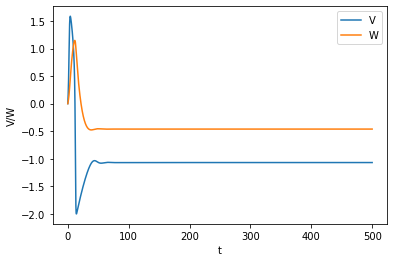

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, y[:,0], label='V')
ax.plot(t, y[:,1], label='W')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('V/W')

In [ ]:
# Bonus: try a loop over different values of I, and
# plot voltage traces together 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aba89c40-4d80-43b4-8007-96b61ce30742' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>